### 2 (solution 1) simpler answer

We solve for  $\text{arg }\underset{\beta}{\text{min}}\mathbb{P}_n(Y - (\Omega X)^{T} \beta)^2$ through taking the derivative w.r.t to $\beta$ and setting to 0 as done in the following steps.

\begin{align}
0 &= \mathbb{P}_n(Y - (\Omega X)^{T} \beta)\Omega X \\
0 &= \mathbb{P}_n(\Omega XY - \Omega X(\Omega X)^{T} \beta) \\
\beta &= (\mathbb{P}_n\Omega X(\Omega X)^{T})^{-1}\mathbb{P}_n\Omega XY \\
      &= (\mathbb{P}_n\Omega X X^{T}\Omega^{T})^{-1}\mathbb{P}_n\Omega XY \\
      &= (\Omega \{\mathbb{P}_nX X^{T}\} \Omega^{T})^{-1}\Omega \mathbb{P}_nXY
\end{align}

Let $\beta^{*,\Omega}_n = (\Omega \{\mathbb{P}_nX X^{T}\} \Omega^{T})^{-1}\Omega \mathbb{P}_nXY$.

Notice that this only depends on the data from $\mathbb{P}_n X X^{T}$ and $\mathbb{P}_nX Y$ so we only need to sweep through the data once to construct this estimator.

We can partition our dataset, $\{X_i, Y_i\}^{n}_{i=1}$ , into $C_1, ..., C_k$ and calculate 

$\Sigma_j = \sum_{i \in C_j} X_i X^{T}_i$ and $\Gamma_j = \sum_{i \in C_j} X_i Y_i$.

Then $\beta^{*,\Omega}_n = (\Omega \left\{\sum^{k}_{i=1}\Sigma_i \right\} \Omega^{T})^{-1}\Omega \left\{\sum^{k}_{i=1}\Gamma_i \right\}$

As $X_i X^{T}_i$ is $pxp$ and $X_i Y_i$ is $px1$, so our storage is $O(p^2 + p) \approx O(p^2)$


Using this we can now define:
$\hat{\beta}^{\Omega}_n = \Omega^{T}\beta^{*,\Omega}_n$ and 

$\hat{\beta}^{\text{ave}}_n = \frac{1}{B} \sum^{B}_{b=1} = \hat{\beta}^{\Omega_{(b)}}_n$ can be evaluated with only one sweep through the data.

### old solution. Much more complicated. Should not be used.

We can write $\text{arg }\underset{\beta}{\text{min}}\mathbb{P}_n(Y - (\Omega X)^{T} \beta)^2$

\begin{align}
\mathbb{P}_n(Y - (\Omega X)^{T} \beta)^2 &= \mathbb{P}_n(Y - X^{T}\hat{\beta}_n + X^{T}\hat{\beta}_n - (\Omega X)^{\intercal} \beta)^2 \\
&= \mathbb{P}_n(Y - X^{T}\hat{\beta}_n)^2 + \mathbb{P}_n(X^{T}\hat{\beta}_n - (\Omega X)^{T} \beta)^2 \\
&= \mathbb{P}_n((Y - X^{T}\hat{\beta}_n)^2 +  (\hat{\beta}_n - \Omega^{T} \beta)^{T}\mathbb{P}_nXX^{T}(\hat{\beta}_n - \Omega^{T} \beta)
\end{align}

So we can write $\text{arg}\underset{\beta}{\text{min}}\mathbb{P}_n(Y - (\Omega X)^{T} \beta)^2$ as $\text{arg}\underset{\beta}{\text{min}}(\hat{\beta}_n - \Omega^{T} \beta)^{T}\mathbb{P}_nXX^{T}(\hat{\beta}_n - \Omega^{T} \beta)$ , 



and $\hat{\beta}^{\Omega}_n = \Omega^{T} \text{arg}\underset{\beta}{\text{min}}(\hat{\beta}_n - \Omega^{T} \beta)^{T}\mathbb{P}_nXX^{\intercal}(\hat{\beta}_n - \Omega^{T} \beta)$


Since only $\hat{\beta}_n = (\mathbb{P}_nXX^{\intercal})^{-1}\mathbb{P}_nXY$ and $\mathbb{P}_nXX^{\intercal}$ depend on the data, we can split our data $\{X_i, Y_i\}^{n}_{i=1}$ we can partition our dataset into $C_1, ..., C_k$ and calculate 

$\Sigma_j = \sum_{i \in C_j} X_i X^{T}_i$ and $\Gamma_j = \sum_{i \in C_j} X_i Y_i$.

Thus, $\hat{\beta}_n = \sum^{k}_{i=1} \left(\Sigma_i \right)^{-1}\left(\Gamma_i \right)$ and 
 $\hat{\beta}^{\Omega}_n = \Omega^{T} \text{arg}\underset{\beta}{\text{min}}(\hat{\beta}_n - \Omega^{T} \beta)^{T}\left(\sum^{k}_{i=1}\Sigma_i \right)^{-1}  (\hat{\beta}_n - \Omega^{T} \beta)$, where $\hat{\beta}^{\Omega}_n$ can be evaluated using stochastic gradient descent for each $\Omega$.
 
 
 As $X_i X^{T}_i$ is $pxp$ and $X_i Y_i$ is $px1$, so our storage is $O(p^2 + p) \approx O(p^2)$

We can analyitcally solve for $\hat{\beta}^{\Omega}_n$ by taking the derivative w.r.t. $\beta$ in the expression $\text{arg}\underset{\beta}{\text{min}}(\hat{\beta}_n - \Omega^{T} \beta)^{T}\mathbb{P}_nXX^{\intercal} (\hat{\beta}_n - \Omega^{T} \beta)$.

Expanding $(\hat{\beta}_n - \Omega^{T} \beta)^{T}\mathbb{P}_nXX^{\intercal}   (\hat{\beta}_n - \Omega^{T} \beta)$ gives    
$\hat{\beta}^{T}_n \mathbb{P}_nXX^{\intercal}  \hat{\beta}_n   -  2\hat{\beta}^{T}_n\mathbb{P}_nXX^{\intercal} \Omega^{T} \beta + (\Omega^{T} \beta)^{T}\mathbb{P}_nXX^{\intercal} \Omega^{T} \beta$.

Differentiating w.r.t $\beta$ and setting to 0 gives the following:

\begin{align}
0 &= -2\hat{\beta}^{T}_n\mathbb{P}_nXX^{\intercal} \Omega^{T} + 2 \Omega\mathbb{P}_nXX^{\intercal} \Omega^{T} \beta \\ 
\Omega\mathbb{P}_nXX^{\intercal} \Omega^{T} \beta &= \hat{\beta}^{T}_n\mathbb{P}_nXX^{\intercal} \Omega^{T} \\
\beta &= \left(\Omega\mathbb{P}_nXX^{\intercal} \Omega^{T} \right)^{-1}\hat{\beta}^{T}_n\mathbb{P}_nXX^{\intercal} \Omega^{T}
\end{align}


Therefore $\text{arg}\underset{\beta}{\text{min}}(\hat{\beta}_n - \Omega^{T} \beta)^{T}\left(\sum^{k}_{i=1}\Sigma_i \right)  (\hat{\beta}_n - \Omega^{T} \beta) = \left\{\Omega \left(\sum^{k}_{i=1}\Sigma_i \right)\Omega^{T} \right\}^{-1}\hat{\beta}^{T}_n\left(\sum^{k}_{i=1}\Sigma_i \right)\Omega^{T}$


Let $\beta^{*,\Omega}_n = \left\{\Omega \left(\sum^{k}_{i=1}\Sigma_i \right)\Omega^{T} \right\}^{-1}\hat{\beta}^{T}_n\left(\sum^{k}_{i=1}\Sigma_i \right)\Omega^{T}$.


Now we can write,  $\hat{\beta}^{\Omega}_n = \Omega^{T}\beta^{*,\Omega}_n$.

### 3.

From problem 2:

We can partition our dataset into $C_1, ..., C_k$ and calculate 

$\Sigma_j = \sum_{i \in C_j} X_i X^{T}_i$ and $\Gamma_j = \sum_{i \in C_j} X_i Y_i$.

Then $\beta^{*,\Omega}_n = (\Omega \left\{\sum^{k}_{i=1}\Sigma_i \right\} \Omega^{T})^{-1}\Omega \left\{\sum^{k}_{i=1}\Gamma_i \right\}$

We can therefore sweep through the data once and then find each $\hat{\beta}_n^{\Omega^{(b)}}$ at the end, the values of which we may use to calculate the final value of $\hat{\beta}_n^{\text{ave}}$.


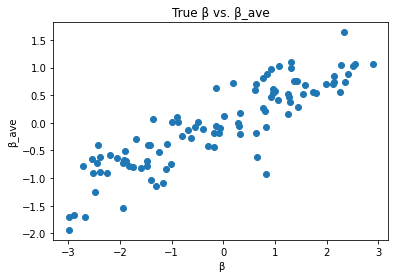

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# model parameters
n = 10000
p = 100
j = 50
B = 25
k_min = 1
k_max = 100

# generate sample data
X = np.random.normal(size=(p, n))
β = np.random.uniform(-3, 3, p) 
y = X.T @ β + np.random.normal(p)

# partitions
C = np.arange(n)
np.random.shuffle(C)
C = C.reshape(j, n // j)

# sufficient stats
Σ = np.zeros((p, p))
Γ = np.zeros(p)

for i in range(j):
    Σ += X[:, C[i]] @ X[:, C[i]].T
    Γ += X[:, C[i]] @ y[C[i]]
    
# result storage
β_ave = np.zeros(p)

for _ in range(B):
    k = np.random.randint(low=k_min, high=k_max)             # P(k) is uniform on set
    Ω = np.random.binomial(n=1, p=0.5, size=(k, p)) * 2 - 1  # Rademacher = binomial * 2 - 1
    β_ave += Ω.T @ np.linalg.inv(Ω @ Σ @ Ω.T) @ Ω @ Γ
    
β_ave /= B

plt.scatter(β, β_ave)
plt.title("True β vs. β_ave")
plt.xlabel("β")
plt.ylabel("β_ave")
plt.show()